In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

tfds.disable_progress_bar()
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [2]:
from glob import glob
trn1='D:/INV/data/invasive-aquatic-species-data/invasive/*/'
trn2='D:/INV/data/invasive-aquatic-species-data/noninvasive/*/'
tr1= glob(trn1)
tr2= glob(trn2)
tr1= shuffle(tr1)
tr2= shuffle(tr2)

tran_index_inv = np.round( len(tr1)* .99 )
tran_index_noninv = np.round( len(tr2)* .99  )
tran_index_noninv

3663.0

In [3]:
data = []
label = []
for i in tr1[:(int) (tran_index_inv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(1)


for i in tr2[:(int)(tran_index_noninv)]:
    for j in glob(i+'/*'):
        data.append(j)
        label.append(0)

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((20, 20))
    c = np.array(b)
    imgdata.append(c.reshape(20,20,3))
    

In [4]:
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
train_df = idata
train_df = train_df.astype('float32') / 255.
train_df = np.reshape(train_df, (len(train_df),20,20,3))
Y_train = to_categorical(label)

train_df,Y_train = shuffle(train_df,Y_train)

In [5]:
X_train, X_unlab, y_train, y_unlab = train_test_split( train_df,Y_train , test_size=0.6, random_state=42 )

In [6]:
x_train, X_test, Y_train, y_test = train_test_split( X_train,y_train , test_size=0.1, random_state=42 )

In [7]:
# Helper function for merging new history objects with older ones
def append_history(losses, val_losses, accuracy, val_accuracy, history):
    losses = losses + history.history["loss"]
    val_losses = val_losses + history.history["val_loss"]
    accuracy = accuracy + history.history["accuracy"]
    val_accuracy = val_accuracy + history.history["val_accuracy"]
    return losses, val_losses, accuracy, val_accuracy


# Plotter function
def plot_history(losses, val_losses, accuracies, val_accuracies):
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(["train_loss", "val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(["train_accuracy", "val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

In [31]:
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'num_patches': self.num_patches,
            'projection': self.projection,
            'position_embedding': self.position_embedding
        })
        return config

In [32]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(4, (3, 3), strides=(2,2),activation='relu')),
                TimeDistributed(Flatten()),
                layers.LSTM(projection_dim,return_sequences=True,dropout=0.1),
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [14]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE

def create_model():
    
    
    model = models.Sequential()
    model.add(layers.Conv2D(2, (3, 3), input_shape=(20, 20, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten()) 
    model.add(layers.Dense(16))
    model.add(layers.Dense(2, activation="softmax"))

    model.summary()
    return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 18, 18, 2)         56        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 2)          0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 162)               0         
                                                                 
 dense_4 (Dense)             (None, 16)                2608      
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 2,698
Trainable params: 2,698
Non-trainable params: 0
____________________________________________________

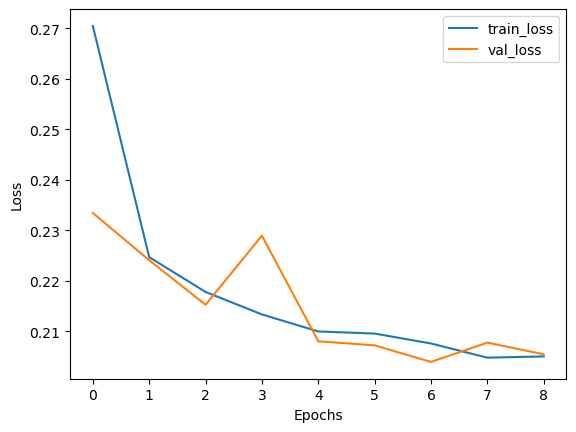

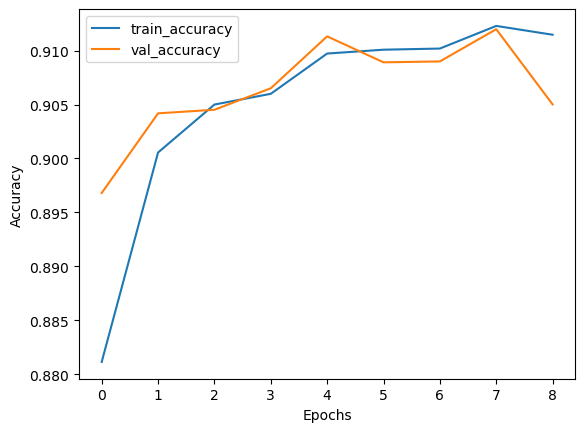

----------------------------------------------------------------------------------------------------
Test set evaluation:  {'loss': 0.20792733132839203, 'accuracy': 0.9036954045295715}
----------------------------------------------------------------------------------------------------


In [16]:
# callbacks=[keras.callbacks.EarlyStopping(patience=4, verbose=1), ],

def train_full_model(x_train, X_test, Y_train, y_test):
    model = create_model()
    model.compile( loss="categorical_crossentropy",  optimizer="Adam",  metrics='accuracy' )

    history = model.fit( x_train, Y_train, batch_size = 16, epochs=20,
                        validation_split=.30,callbacks=[ keras.callbacks.EarlyStopping(patience=2, verbose=1),
                        keras.callbacks.ModelCheckpoint( "FullModelCheckpoint.h5",
                        verbose=1, save_best_only=True ), ], )

    plot_history(
        history.history["loss"],
        history.history["val_loss"],
        history.history["accuracy"],
        history.history["val_accuracy"],
    )


    print("-" * 100)
    print(
        "Test set evaluation: ",
        model.evaluate( X_test, y_test , verbose=0, return_dict=True),
    )
    print("-" * 100)
    return model


full_dataset_model = train_full_model(x_train, X_test, Y_train, y_test)

In [19]:
from sklearn.metrics import confusion_matrix

def train_active_learning_models(
    X_train,
    Y_train,
    X_unlab,
    y_unlab,
    X_test,
    y_test,
    num_iterations=2,
    sampling_size=50,
):

    # Creating lists for storing metrics
    losses, val_losses, accuracies, val_accuracies = [], [], [], []

    model = create_model()
    # We will monitor the false positives and false negatives predicted by our model
    # These will decide the subsequent sampling ratio for every Active Learning loop
    model.compile(
        loss="categorical_crossentropy",
        optimizer="Adam",
        metrics='accuracy',
    )
    
    checkpoint = keras.callbacks.ModelCheckpoint(
        "AL_Model.h5", save_best_only=True, verbose=1
    )
    
    early_stopping = keras.callbacks.EarlyStopping(patience=2, verbose=1)

    print(f"Starting to train with {len(Y_train)} samples")

    history = model.fit(x_train, Y_train, batch_size = 256, epochs=1,validation_split=.50,
                        callbacks=[checkpoint, early_stopping],
    )
    losses, val_losses, accuracies, val_accuracies = append_history(
        losses, val_losses, accuracies, val_accuracies, history
    )
    
    
    
    for iteration in range(num_iterations):
     
        predictions = model.predict(X_test)

        # Generating labels from the output probabilities
        rounded = tf.where(tf.greater(predictions, 0.5), 1, 0)
        
        y_test_non = [ np.argmax(t) for t in y_test ]
        y_pred_non = [ np.argmax(t) for t in rounded ]
        
        CM = confusion_matrix(y_test_non, y_pred_non)
        
        false_negatives = CM[1][0]
        false_positives = CM[0][1]
        
        if false_negatives != 0 and false_positives != 0:
            total = false_negatives + false_positives
            sample_ratio_ones, sample_ratio_zeros = (
                false_positives / total,
                false_negatives / total,
            )
        # In the case where all samples are correctly predicted, we can sample both classes equally
        else:
            sample_ratio_ones, sample_ratio_zeros = 0.5, 0.5

        print(
            f"Sample ratio for positives: {sample_ratio_ones}, Sample ratio for negatives:{sample_ratio_zeros}"
        )

        
        
    
    return model

active_learning_model = train_active_learning_models(X_train,Y_train,X_unlab,y_unlab,X_test,y_test,num_iterations=3,sampling_size=50)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 18, 18, 2)         56        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 2)          0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 162)               0         
                                                                 
 dense_10 (Dense)            (None, 16)                2608      
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 2,698
Trainable params: 2,698
Non-trainable params: 0
____________________________________________________

In [16]:
pred = full_dataset_model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [18]:
p = np.round(pred)

In [21]:
f = tf.where(tf.greater(pred, 0.5), 1, 0)
f

<tf.Tensor: shape=(87, 2), dtype=int32, numpy=
array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [

In [24]:
p =  (f[0] == y_test[0])
p

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True,  True])>